# Image Segmentation Algorithm

This notebook implements a segmentation algorithm using a simulated image. The process follows these steps:

1. Create a 100x100 image with 10 random pixels set to 1
2. Apply Gaussian blur to the image
3. Normalize the image to the range 0-1
4. Apply a threshold of 0.5
5. Perform connected component labeling
6. Count the number of objects (should be 10)

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from skimage.measure import label, regionprops

# Set random seed for reproducibility
np.random.seed(42)

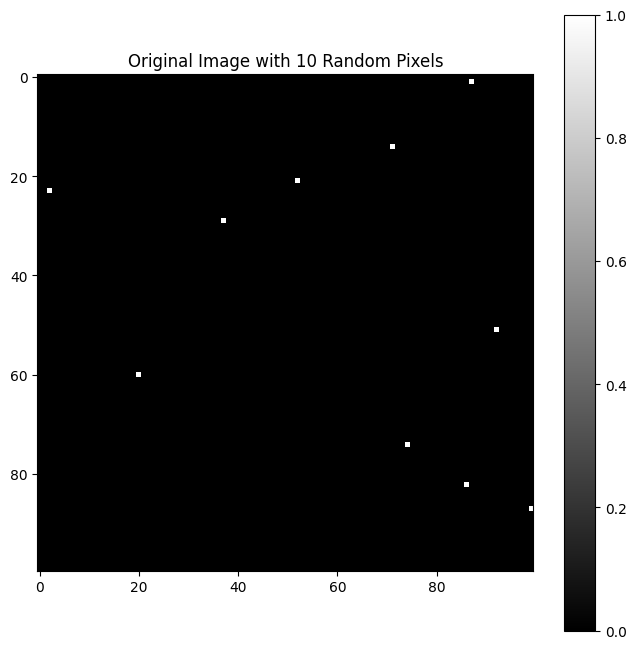

In [2]:
# Create a 100x100 image with 10 random pixels set to 1
image = np.zeros((100, 100))
random_pixels = np.random.randint(0, 100, size=(10, 2))
for pixel in random_pixels:
    image[pixel[0], pixel[1]] = 1

# Display the original image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray')
plt.title('Original Image with 10 Random Pixels')
plt.colorbar()
plt.show()

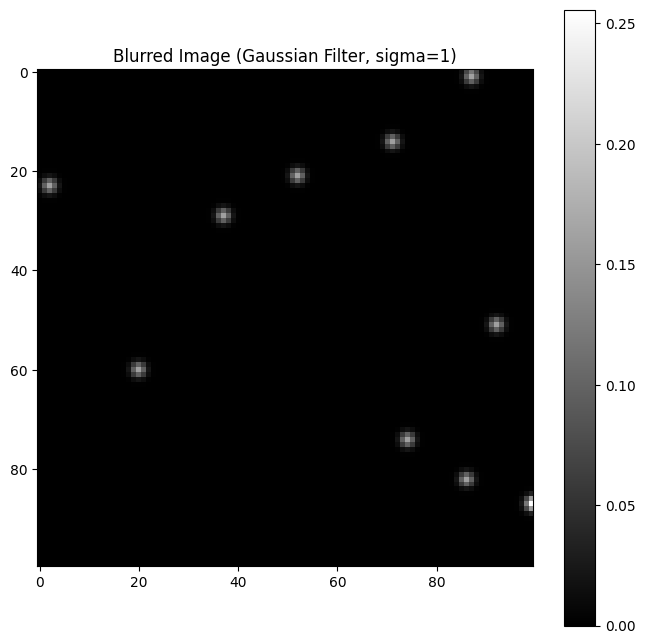

In [3]:
# Apply Gaussian blur
blurred_image = gaussian_filter(image, sigma=1)

# Display the blurred image
plt.figure(figsize=(8, 8))
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image (Gaussian Filter, sigma=1)')
plt.colorbar()
plt.show()

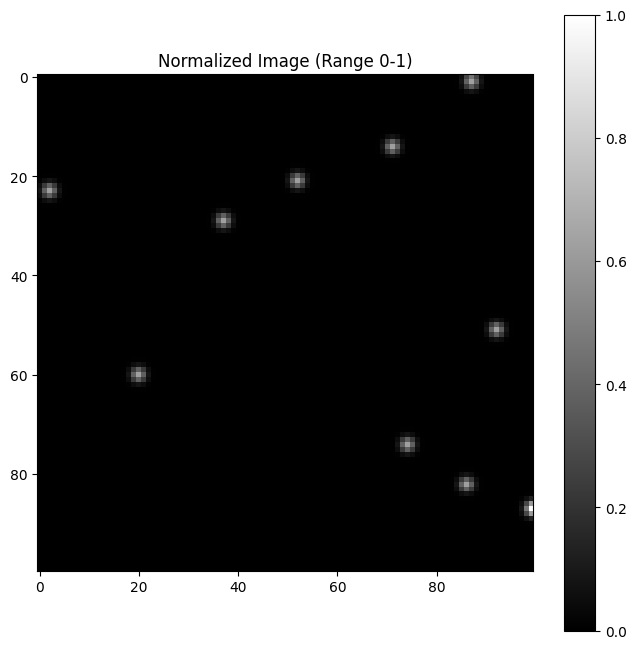

In [4]:
# Normalize the image to the range 0-1
normalized_image = blurred_image / blurred_image.max()

# Display the normalized image
plt.figure(figsize=(8, 8))
plt.imshow(normalized_image, cmap='gray')
plt.title('Normalized Image (Range 0-1)')
plt.colorbar()
plt.show()

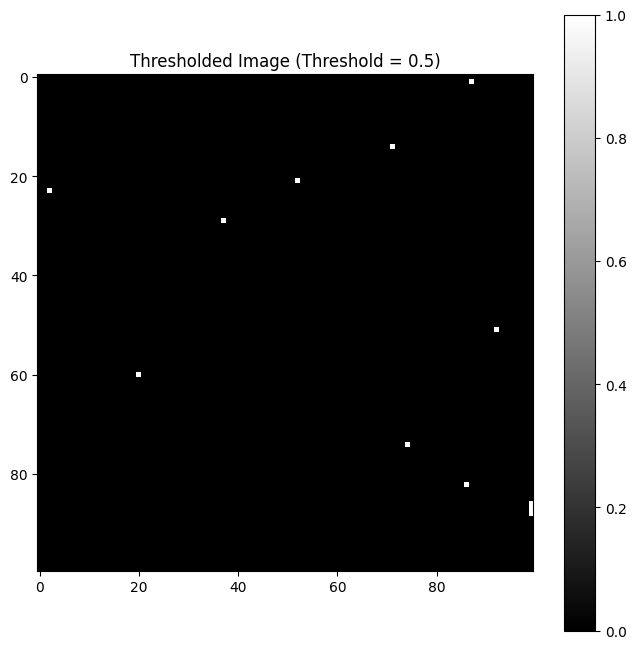

In [5]:
# Apply a threshold of 0.5
thresholded_image = normalized_image > 0.5

# Display the thresholded image
plt.figure(figsize=(8, 8))
plt.imshow(thresholded_image, cmap='gray')
plt.title('Thresholded Image (Threshold = 0.5)')
plt.colorbar()
plt.show()

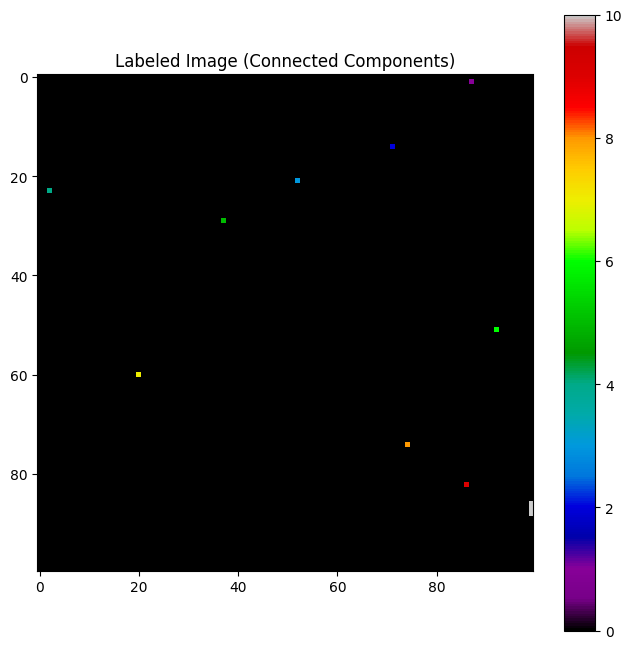

In [6]:
# Perform connected component labeling
labeled_image = label(thresholded_image)

# Display the labeled image
plt.figure(figsize=(8, 8))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title('Labeled Image (Connected Components)')
plt.colorbar()
plt.show()

In [7]:
# Count the number of objects
regions = regionprops(labeled_image)
num_objects = len(regions)

print(f'Number of objects detected: {num_objects}')
print(f'Expected number of objects: 10')

# Verify if the count matches the expected number
if num_objects == 10:
    print("✅ Success! The segmentation algorithm correctly identified all 10 objects.")
else:
    print(f"❌ The segmentation algorithm detected {num_objects} objects instead of the expected 10.")

Number of objects detected: 10
Expected number of objects: 10
✅ Success! The segmentation algorithm correctly identified all 10 objects.


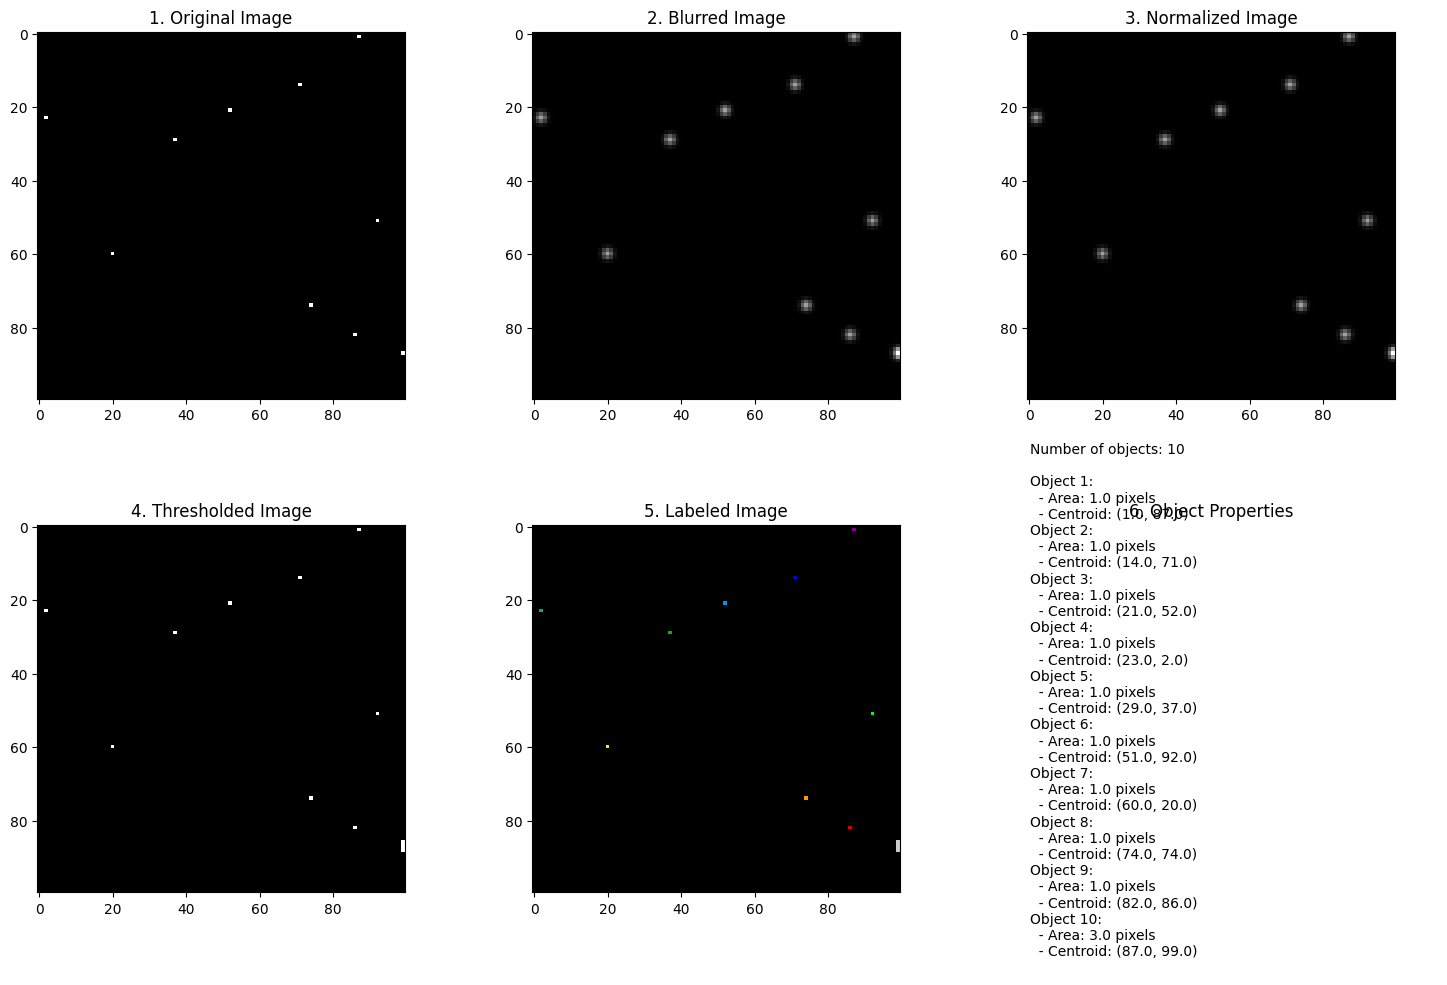

In [8]:
# Display all steps in a single figure for comparison
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

axes[0].imshow(image, cmap='gray')
axes[0].set_title('1. Original Image')

axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('2. Blurred Image')

axes[2].imshow(normalized_image, cmap='gray')
axes[2].set_title('3. Normalized Image')

axes[3].imshow(thresholded_image, cmap='gray')
axes[3].set_title('4. Thresholded Image')

axes[4].imshow(labeled_image, cmap='nipy_spectral')
axes[4].set_title('5. Labeled Image')

# Add object properties in the last subplot
axes[5].axis('off')
props_text = f"Number of objects: {num_objects}\n\n"
for i, region in enumerate(regions):
    props_text += f"Object {i+1}:\n"
    props_text += f"  - Area: {region.area} pixels\n"
    props_text += f"  - Centroid: ({region.centroid[0]:.1f}, {region.centroid[1]:.1f})\n"
    
axes[5].text(0.1, 0.5, props_text, fontsize=10, verticalalignment='center')
axes[5].set_title('6. Object Properties')

plt.tight_layout()
plt.show()

## Conclusion

This notebook demonstrates a complete image segmentation pipeline:

1. We created a simulated 100x100 image with 10 random pixels set to 1
2. Applied Gaussian blur to spread the signal
3. Normalized the image to the range 0-1
4. Applied a threshold of 0.5 to create a binary image
5. Performed connected component labeling to identify distinct objects
6. Counted the number of objects and verified it matches the expected count of 10

The segmentation algorithm successfully identifies all 10 objects in the simulated image.